# Ejemplo snscrape

## Realizar un análisis de sentimiento de 1,000 tweets para saber el consenso general (positivo, negativo, neutral) del término de búsqueda "Donald Trump".

Librerías utilizadas

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import snscrape.modules.twitter as sntwitter

Se define el Scrapper

In [2]:
scraper = sntwitter.TwitterSearchScraper("Donald Trump")

In [3]:
for tweet in scraper.get_items():
    break

Objeto tweet

In [4]:
tweet

Tweet(url='https://twitter.com/pkmnlocator/status/1638326175067172867', date=datetime.datetime(2023, 3, 21, 23, 46, 13, tzinfo=datetime.timezone.utc), rawContent="Marowak was recently seen lurking underneath Donald Trump's hair.", renderedContent="Marowak was recently seen lurking underneath Donald Trump's hair.", id=1638326175067172867, user=User(username='pkmnlocator', id=760164450506829824, displayname='Pokémon Locator', rawDescription='Helping you find Pokémon wherever they roam! Follow our advice. Find The Pokémon. Created by @foresthousecult and @r0wdyruff.', renderedDescription='Helping you find Pokémon wherever they roam! Follow our advice. Find The Pokémon. Created by @foresthousecult and @r0wdyruff.', descriptionLinks=None, verified=False, created=datetime.datetime(2016, 8, 1, 17, 25, 2, tzinfo=datetime.timezone.utc), followersCount=56, friendsCount=4, statusesCount=114309, favouritesCount=1, listedCount=4, mediaCount=0, location='', protected=False, link=None, profileImageUr

Se extraen los datos importantes de un tweet y se guardan en un dataframe

In [5]:
tweets = []
ntweets = 100
for i, tweet in tqdm(enumerate(scraper.get_items()), total = ntweets):
    data = [
        tweet.date,
        tweet.id,
        tweet.rawContent,
        tweet.user.username,
        tweet.likeCount,
        tweet.retweetCount
    ]
    tweets.append(data)
    
    if i >= ntweets:
        break

df = pd.DataFrame(
    tweets, columns=["date", "id", "content", "username", "like_count", "retweet_count"])
df.to_csv("tweets.csv", index=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
df

,date,id,content,username,like_count,retweet_count
0,2023-03-21 23:46:13+00:00,1638326175067172867,Marowak was recently seen lurking underneath D...,pkmnlocator,0,0
1,2023-03-21 23:46:08+00:00,1638326153998921728,Tuesday working hours have come and gone witho...,DanRodricks,1,0
2,2023-03-21 23:46:05+00:00,1638326140472369155,"@MarioNawfal It never ends, these people are a...",debbyredding20,0,0
3,2023-03-21 23:46:02+00:00,1638326130888388609,Here's how Louisiana Republicans are respondin...,NOLAnews,0,0
4,2023-03-21 23:46:01+00:00,1638326127100821504,@EliseStefanik REALITY\n\nA core crime that th...,SoulWomen,0,0
...,...,...,...,...,...,...
96,2023-03-21 23:42:33+00:00,1638325252101926912,@nytimes All this is a campaign commercial for...,phummel78,0,0
97,2023-03-21 23:42:32+00:00,1638325250076057600,Donald Trump supporters begin gathering in New...,SCMPNews,3,1
98,2023-03-21 23:42:30+00:00,1638325240580251649,This video is why #DonaldTrump should be Presi...,TommyBo03328068,0,0
99,2023-03-21 23:42:29+00:00,1638325237442830336,"Before we get too far down the rabbit-hole, he...",nontech_techie,0,0


Se utiliza una librería de análisis de sentimiento preentrenada

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [9]:
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    return negative, neutral, positive, compound, overall_sentiment

In [10]:
sentiment_vader("Great")

(0.0, 0.0, 1.0, 0.6249, 'Positive')

In [11]:
sentiment_vader("Ouh")

(0.0, 1.0, 0.0, 0.0, 'Neutral')

In [12]:
sentiment_vader("You are horrible")

(0.636, 0.364, 0.0, -0.5423, 'Negative')

In [13]:
df["sentiment"] = [sentiment_vader(i)[4] for i in df["content"]]

Se añade la determinación de análsis de sentimiento al dataset.

In [14]:
df

,date,id,content,username,like_count,retweet_count,sentiment
0,2023-03-21 23:46:13+00:00,1638326175067172867,Marowak was recently seen lurking underneath D...,pkmnlocator,0,0,Negative
1,2023-03-21 23:46:08+00:00,1638326153998921728,Tuesday working hours have come and gone witho...,DanRodricks,1,0,Positive
2,2023-03-21 23:46:05+00:00,1638326140472369155,"@MarioNawfal It never ends, these people are a...",debbyredding20,0,0,Negative
3,2023-03-21 23:46:02+00:00,1638326130888388609,Here's how Louisiana Republicans are respondin...,NOLAnews,0,0,Negative
4,2023-03-21 23:46:01+00:00,1638326127100821504,@EliseStefanik REALITY\n\nA core crime that th...,SoulWomen,0,0,Negative
...,...,...,...,...,...,...,...
96,2023-03-21 23:42:33+00:00,1638325252101926912,@nytimes All this is a campaign commercial for...,phummel78,0,0,Neutral
97,2023-03-21 23:42:32+00:00,1638325250076057600,Donald Trump supporters begin gathering in New...,SCMPNews,3,1,Positive
98,2023-03-21 23:42:30+00:00,1638325240580251649,This video is why #DonaldTrump should be Presi...,TommyBo03328068,0,0,Negative
99,2023-03-21 23:42:29+00:00,1638325237442830336,"Before we get too far down the rabbit-hole, he...",nontech_techie,0,0,Negative


Se realiza un gráfico de pastel con lo obtenido en el análisis de sentimiento.

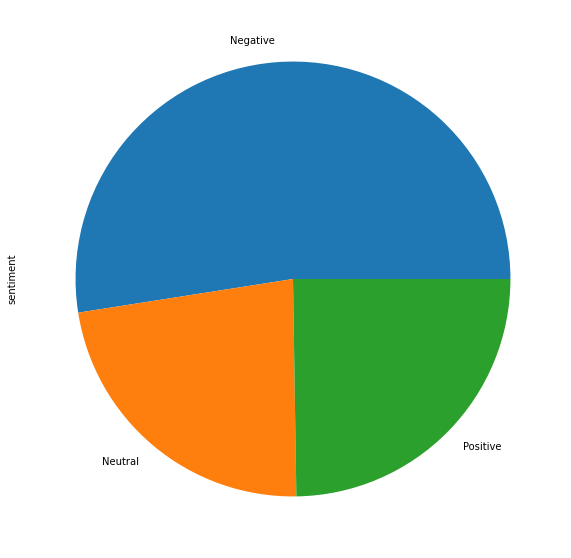

In [15]:
df_1 = df.groupby("sentiment")["sentiment"].count().plot.pie(figsize=(10,10))